In [43]:
from util import get_apl_ufloat, get_pct_error_ufloat
from uncertainties import ufloat, unumpy
from formulas import *
%load_ext autoreload
%autoreload 2
import math
import pandas as pd

t_error = 50e-6
t_b = get_pct_error_ufloat(0.017545199000, t_error) - get_pct_error_ufloat(0.017125198600, t_error)
t_a = get_pct_error_ufloat(0.017512800200,t_error) - get_pct_error_ufloat(0.017087198800,t_error)

C = get_apl_ufloat(0.00000004833)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
4.833e-08


In [44]:
print("Inductor A:\n", get_inductance(t_a, C))

Inductor A:
 Period :0.000425601+/-0.000001223
Frequency: 2349.616331149+/-6.753950137
Angular Frequency: 14763.074809386+/-42.436320266, 
Inductance: 0.094935702+/-0.000546137


In [45]:
print("Inductor B:\n", get_inductance(t_b, C))

Inductor B:
 Period :0.000420000+/-0.000001226
Frequency: 2380.950113381+/-6.949383599
Angular Frequency: 14959.950769522+/-43.664264921, 
Inductance: 0.092453398+/-0.000540034


In [46]:

def optimize(x,y, func, **kwargs):



        # Fit the sine curve using curve_fit
        popt, cov_matrix= curve_fit(func, x, y,**kwargs)

        param_uncertainties = np.sqrt(np.diag(cov_matrix))


        params = unumpy.uarray(popt, param_uncertainties)
        # for i in range(len(popt)):
        #     #print(popt[i], param_uncertainties[i])
        #     popt[i] = ufloat(float(popt[i]), float(param_uncertainties[i]))

        
        # params = 
        #a_fit, b_fit, c_fit ,d_efit, e_fit= popt


        # Calculate the uncertainties from the diagonal of the covariance matrix


            

        print(f"Parameters sin*exp fit for {sheet}: {params}")

        # Plot the original data and the fitted curve
        plt.plot(x, y, 'o', label='data')
        plt.plot(x, func(x, *popt), '-', label='Sine fit')
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title(sheet)
        plt.legend()
        plt.show()

Curve Fitting

Parameters sin*exp fit for inductor_A: [3.0396292540572802+/-0.003493003305561324
 14565.990108951759+/-4.477701622936327
 3.474875998703008+/-0.07773820507270557
 0.3447089115147347+/-0.002568903007410543]


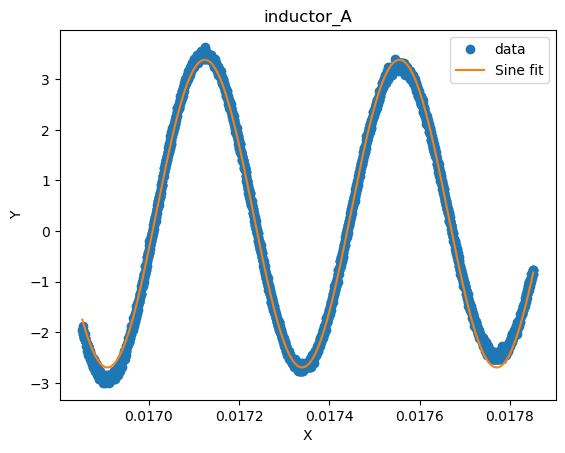

In [47]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def sinefunction(x, a, b, c, d):
    return a * np.sin((b*x) + c) + d


freq_map = {'inductor_A':2349.616331149, 'inductor_B':2380.950113381}

fit_ind = ['inductor_A']

# Assuming 'Time' and 'Voltage' columns exist in the Excel file
for sheet in fit_ind:
    ceo_data = pd.read_excel('data/CEO/CEO_data.xlsx', sheet_name=sheet)

    x = ceo_data['Time']
    y = ceo_data['Voltage(transformed)']


    optimize(x,y, sinefunction, p0 =[3,2*math.pi*freq_map[sheet],0,0] ,maxfev = 100000000)

    # # Fit the sine curve using curve_fit
    # popt, _ = curve_fit(sinefunction, x, y,p0 =[3,2*math.pi*freq_map[sheet],0,0] ,maxfev = 100000000)

    # a_fit, b_fit, c_fit , e_fit= popt

    # print(f"Parameters for {sheet}: a={a_fit}, b={b_fit}, c={c_fit}, e={e_fit}")

    # # Plot the original data and the fitted curve
    # plt.plot(x, y, 'o', label='data')
    # plt.plot(x, sinefunction(x, a_fit, b_fit, c_fit, e_fit), '-', label='Sine fit')
    # plt.xlabel('Time')
    # plt.ylabel('Voltage')
    # plt.title(sheet)
    # plt.legend()
    # plt.show()


Parameters sin*exp fit for inductor_A: [-61.83132759490253+/-1.5086973576142793
 14552.188717091916+/-1.6945563001112405
 6.853123479157224+/-0.02937532693443738
 347.5656359612693+/-2.818348820879736
 0.3413518357317972+/-0.0009647322317515937]


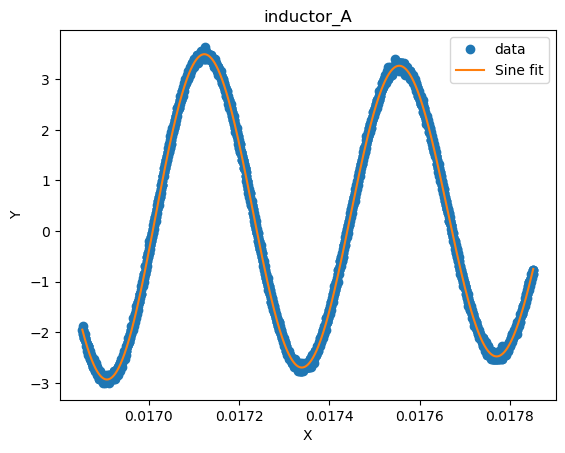

In [48]:

def sinefunction_exp(x, a, b, c, d,e):
    return a * np.sin((b*x) + c)*np.exp(-d*x/2) + e
# Assuming 'Time' and 'Voltage' columns exist in the Excel file


for sheet in ['Inductor_A_full']:
    ceo_data = pd.read_excel('data/CEO/CEO_data.xlsx', sheet_name=sheet)

    x = ceo_data['Time']
    y = ceo_data['Voltage(transformed)']

    optimize(x,y, sinefunction_exp, p0 =[a_fit,2*math.pi*freq_map[sheet],c_fit,0,e_fit] ,maxfev = 100000000)

